# Objectives {.unnumbered}

By the end of this lab, you will:
1. Load and analyze the **Lightcast dataset** in **Spark DataFrame**.
2. Create **five easy and three medium-complexity visualizations** using **Plotly**.
3. Explore **salary distributions, employment trends, and job postings**.
4. Analyze **skills in relation to NAICS/SOC/ONET codes and salaries**.
5. Customize **colors, fonts, and styles** in all visualizations (**default themes result in a 2.5-point deduction**).
6. Follow **best practices for reporting on data communication**.

# Step 1: Load the Dataset {.unnumbered}


In [1]:
import pandas as pd

df = pd.read_csv("lightcast_job_postings.csv")

df.head()

,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,2024-09-06,2024-09-06 20:32:57.352 Z,0,2024-06-02,2024-06-08,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44,Retail Trade,441,Motor Vehicle and Parts Dealers,4413,"Automotive Parts, Accessories, and Tire Retailers",44133,Automotive Parts and Accessories Retailers,441330,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,2024-08-02,2024-08-02 17:08:58.838 Z,0,2024-06-02,2024-08-01,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56,Administrative and Support and Waste Managemen...,561,Administrative and Support Services,5613,Employment Services,56132,Temporary Help Services,561320,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-07,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52,Finance and Insurance,524,Insurance Carriers and Related Activities,5242,"Agencies, Brokerages, and Other Insurance Rela...",52429,Other Insurance Related Activities,524291,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-20,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52,Finance and Insurance,522,Credit Intermediation and Related Activities,5221,Depository Credit Intermediation,52211,Commercial Banking,522110,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,2024-06-19,2024-06-19 07:00:00.000 Z,0,2024-06-02,2024-06-17,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99,Unclassified Industry,999,Unclassified Industry,9999,Unclassified Industry,99999,Unclassified Industry,999999,Unclassified Industry


# Salary Distribution by Employment Type
- Identify salary trends across different employment types.
- **Filter the dataset**
  - Remove records where **salary is missing or zero**.
- **Aggregate Data**
  - Group by **employment type** and compute salary distribution.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `EMPLOYMENT_TYPE_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize **colors, fonts, and styles** to avoid a **2.5-point deduction**.
- **Explanation:** Write two sentences about what the graph reveals.



/tmp/ipykernel_2861/2021970446.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


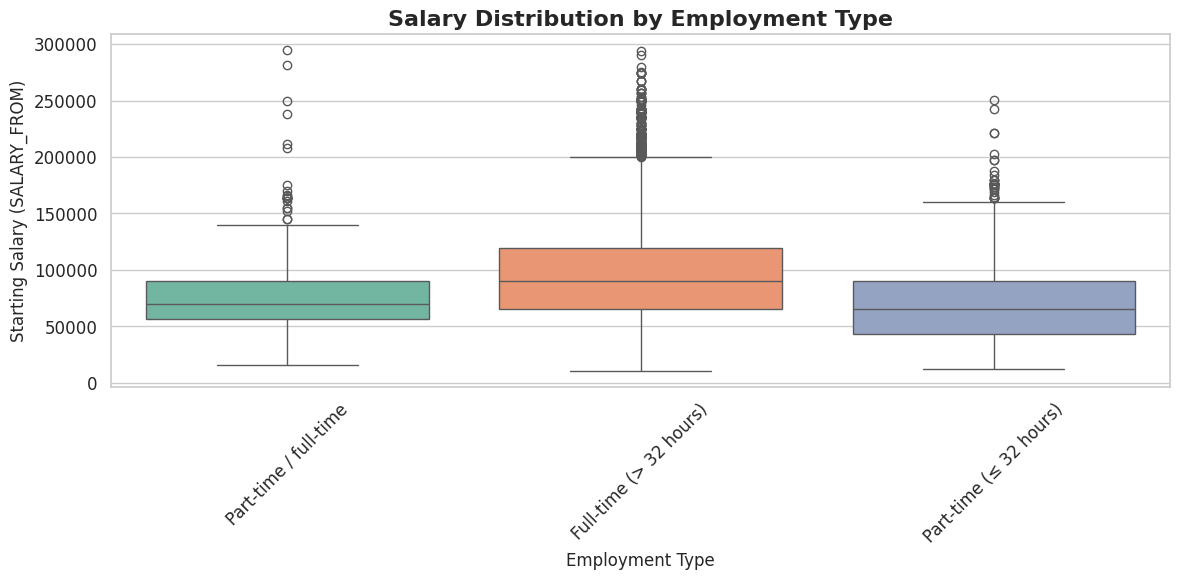

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = pd.read_csv("lightcast_job_postings.csv")

df_filtered = df[(df['SALARY_FROM'].notna()) & (df['SALARY_FROM'] > 0)]

df_filtered = df_filtered[df_filtered['EMPLOYMENT_TYPE_NAME'].notna()]

df_filtered = df_filtered[df_filtered['SALARY_FROM'] < 300000]

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="EMPLOYMENT_TYPE_NAME",
    y="SALARY_FROM",
    data=df_filtered,
    palette="Set2" 
)

plt.title("Salary Distribution by Employment Type", fontsize=16, fontweight='bold')
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Starting Salary (SALARY_FROM)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


This boxplot reveals clear salary differences across employment types. Full-time positions (> 32 hours) have the highest median starting salary and show a wider range, suggesting they include more senior or specialized roles. In contrast, part-time jobs (≤ 32 hours) and hybrid part/full-time roles tend to offer lower and more consistent starting salaries, reflecting standardized pay for flexible or lower-skill positions.

# Salary Distribution by Industry
- Compare salary variations across industries.
- **Filter the dataset**
  - Keep records where **salary is greater than zero**.
- **Aggregate Data**
  - Group by **NAICS industry codes**.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `NAICS2_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize colors, fonts, and styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2861/371862757.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


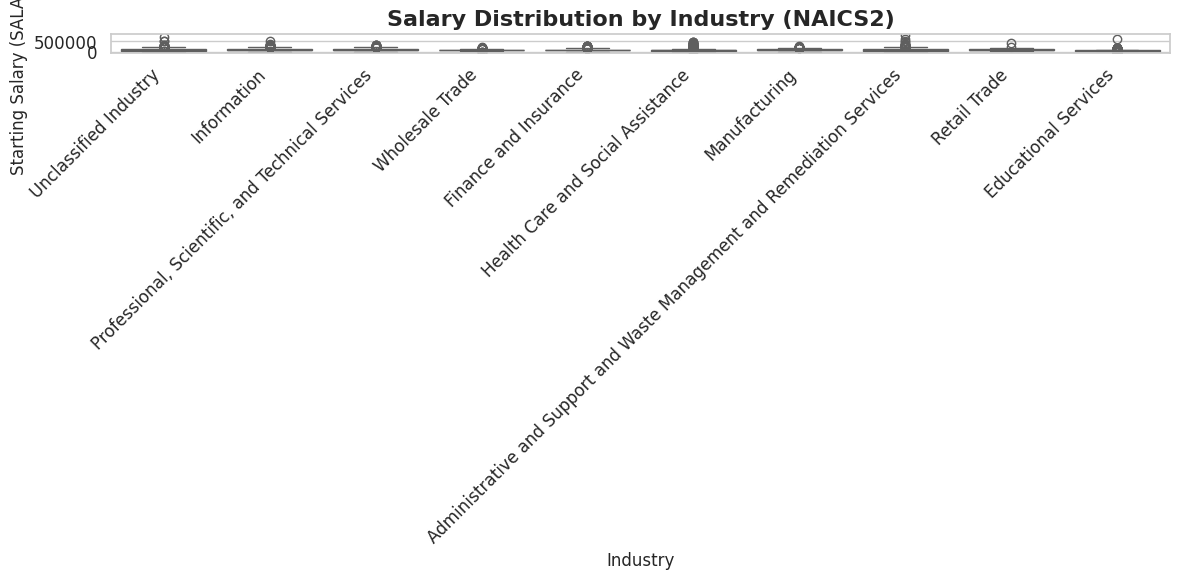

In [4]:
# Your code for 2nd question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = pd.read_csv("lightcast_job_postings.csv")

df_filtered = df[(df['SALARY_FROM'].notna()) & (df['SALARY_FROM'] > 0)]
df_filtered = df_filtered[df_filtered['NAICS2_NAME'].notna()]

top_industries = df_filtered['NAICS2_NAME'].value_counts().head(10).index
df_top = df_filtered[df_filtered['NAICS2_NAME'].isin(top_industries)]


plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="NAICS2_NAME",
    y="SALARY_FROM",
    data=df_top,
    palette="Set3"
)

plt.title("Salary Distribution by Industry (NAICS2)", fontsize=16, fontweight='bold')
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Starting Salary (SALARY_FROM)", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Industries like Professional, Scientific, and Technical Services exhibit higher median starting salaries with a wider range, suggesting a mix of high-paying technical or consulting roles.

In contrast, Retail Trade and Educational Services have lower and more consistent salary distributions, indicating standardized and generally lower compensation in these sectors.

# Job Posting Trends Over Time
- Analyze how job postings fluctuate over time.
- **Aggregate Data**
  - Count job postings per **posted date (`POSTED`)**.
- **Visualize results**
  - Create a **line chart** where:
    - **X-axis** = `POSTED`
    - **Y-axis** = `Number of Job Postings`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

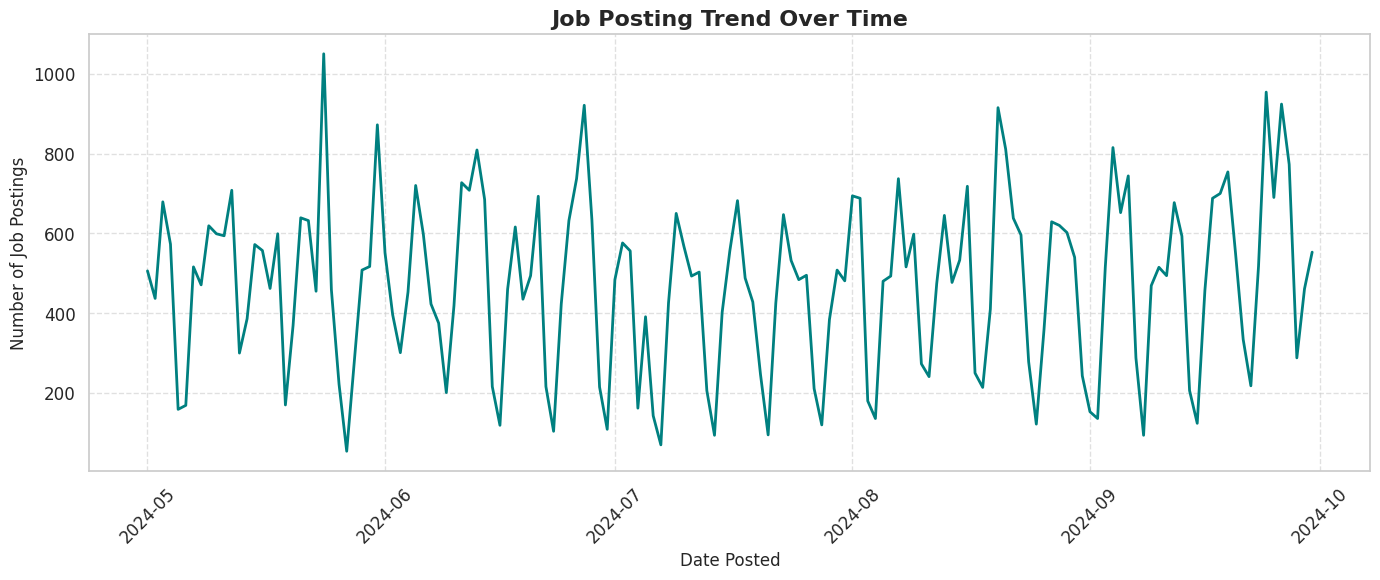

In [5]:
# Your code for 3rd question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = pd.read_csv("lightcast_job_postings.csv")

df['POSTED'] = pd.to_datetime(df['POSTED'], errors='coerce')

df = df[df['POSTED'].notna()]

daily_postings = df.groupby('POSTED').size().reset_index(name='Job_Count')

plt.figure(figsize=(14, 6))
plt.plot(daily_postings['POSTED'], daily_postings['Job_Count'], color='teal', linewidth=2)

plt.title("Job Posting Trend Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date Posted", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


This line chart illustrates daily fluctuations in job postings between May and October 2024. A clear cyclical pattern is visible, with frequent peaks and dips, likely reflecting weekly hiring rhythms or internal scheduling by employers.

# Top 10 Job Titles by Count
- Identify the most frequently posted job titles.
- **Aggregate Data**
  - Count the occurrences of each **job title (`TITLE_NAME`)**.
  - Select the **top 10 most frequent titles**.
- **Visualize results**
  - Create a **bar chart** where:
    - **X-axis** = `TITLE_NAME`
    - **Y-axis** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

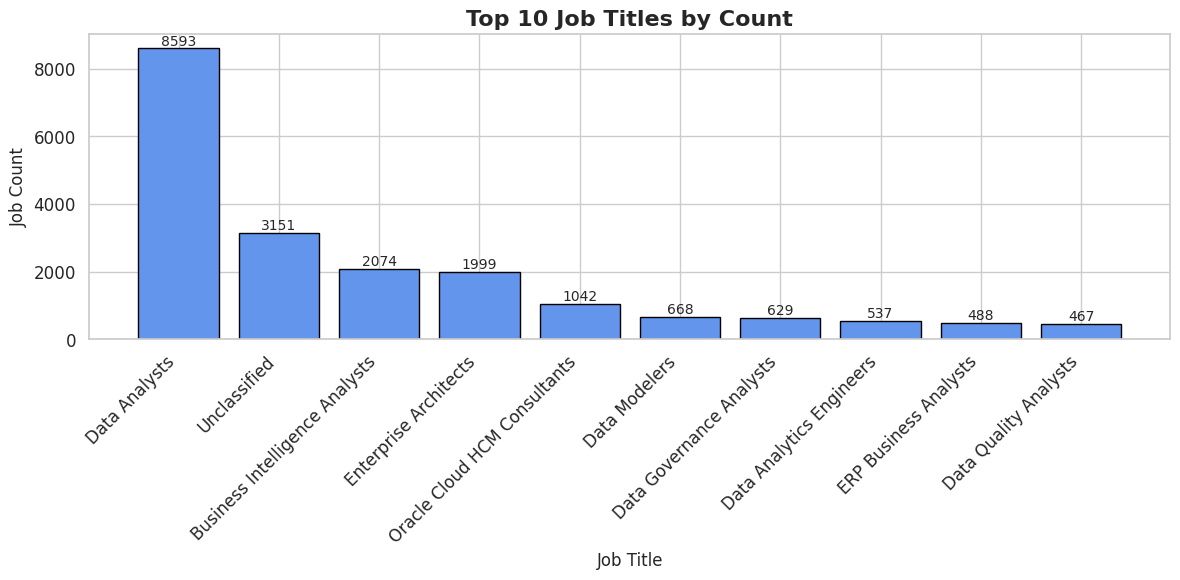

In [6]:
# Your code for 4th question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = pd.read_csv("lightcast_job_postings.csv")

df = df[df['TITLE_NAME'].notna()]

top_titles = df['TITLE_NAME'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_titles.index, top_titles.values, color='cornflowerblue', edgecolor='black')

plt.title("Top 10 Job Titles by Count", fontsize=16, fontweight='bold')
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Job Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, int(height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


This bar chart shows the top 10 most frequently posted job titles. “Data Analysts” dominate the chart with over 8,500 postings, highlighting the strong demand for data professionals. Other roles like “Business Intelligence Analysts” and “Enterprise Architects” further emphasize the centrality of analytics and system architecture in today’s job market.

# Remote vs On-Site Job Postings
- Compare the proportion of remote and on-site job postings.
- **Aggregate Data**
  - Count job postings by **remote type (`REMOTE_TYPE_NAME`)**.
- **Visualize results**
  - Create a **pie chart** where:
    - **Labels** = `REMOTE_TYPE_NAME`
    - **Values** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

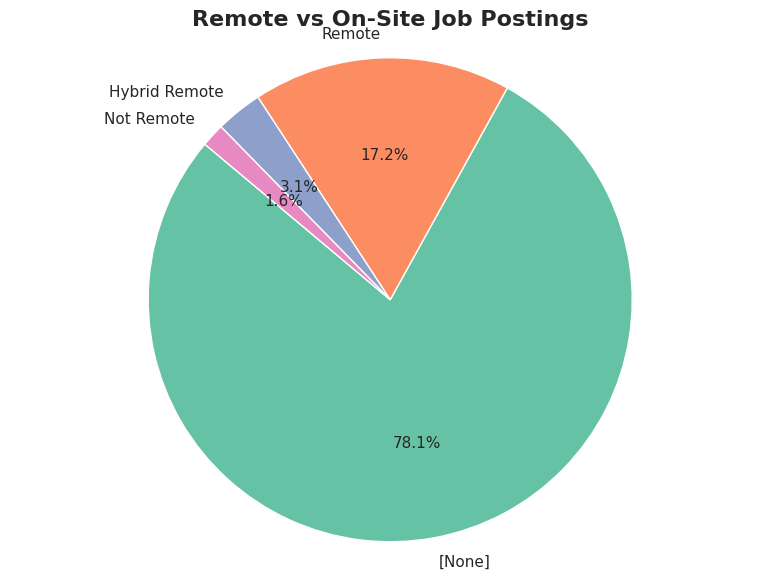

In [7]:
# Your code for 5th question here
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lightcast_job_postings.csv")

df_remote = df[df['REMOTE_TYPE_NAME'].notna()]

remote_counts = df_remote['REMOTE_TYPE_NAME'].value_counts()

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

plt.figure(figsize=(8, 6))
plt.pie(
    remote_counts.values,
    labels=remote_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11}
)

plt.title("Remote vs On-Site Job Postings", fontsize=16, fontweight='bold')
plt.axis('equal') 

plt.tight_layout()
plt.show()


This pie chart illustrates the distribution of job postings by remote type. Although a large portion of postings (78.1%) are unclassified, among the labeled ones, remote roles account for 17.2%, far exceeding hybrid and on-site roles—reflecting a strong demand for flexible, location-independent work arrangements.

# Skill Demand Analysis by Industry (Stacked Bar Chart)
- Identify which skills are most in demand in various industries.
- **Aggregate Data**
  - Extract **skills** from job postings.
  - Count occurrences of skills grouped by **NAICS industry codes**.
- **Visualize results**
  - Create a **stacked bar chart** where:
    - **X-axis** = `Industry`
    - **Y-axis** = `Skill Count`
    - **Color** = `Skill`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2861/604386087.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

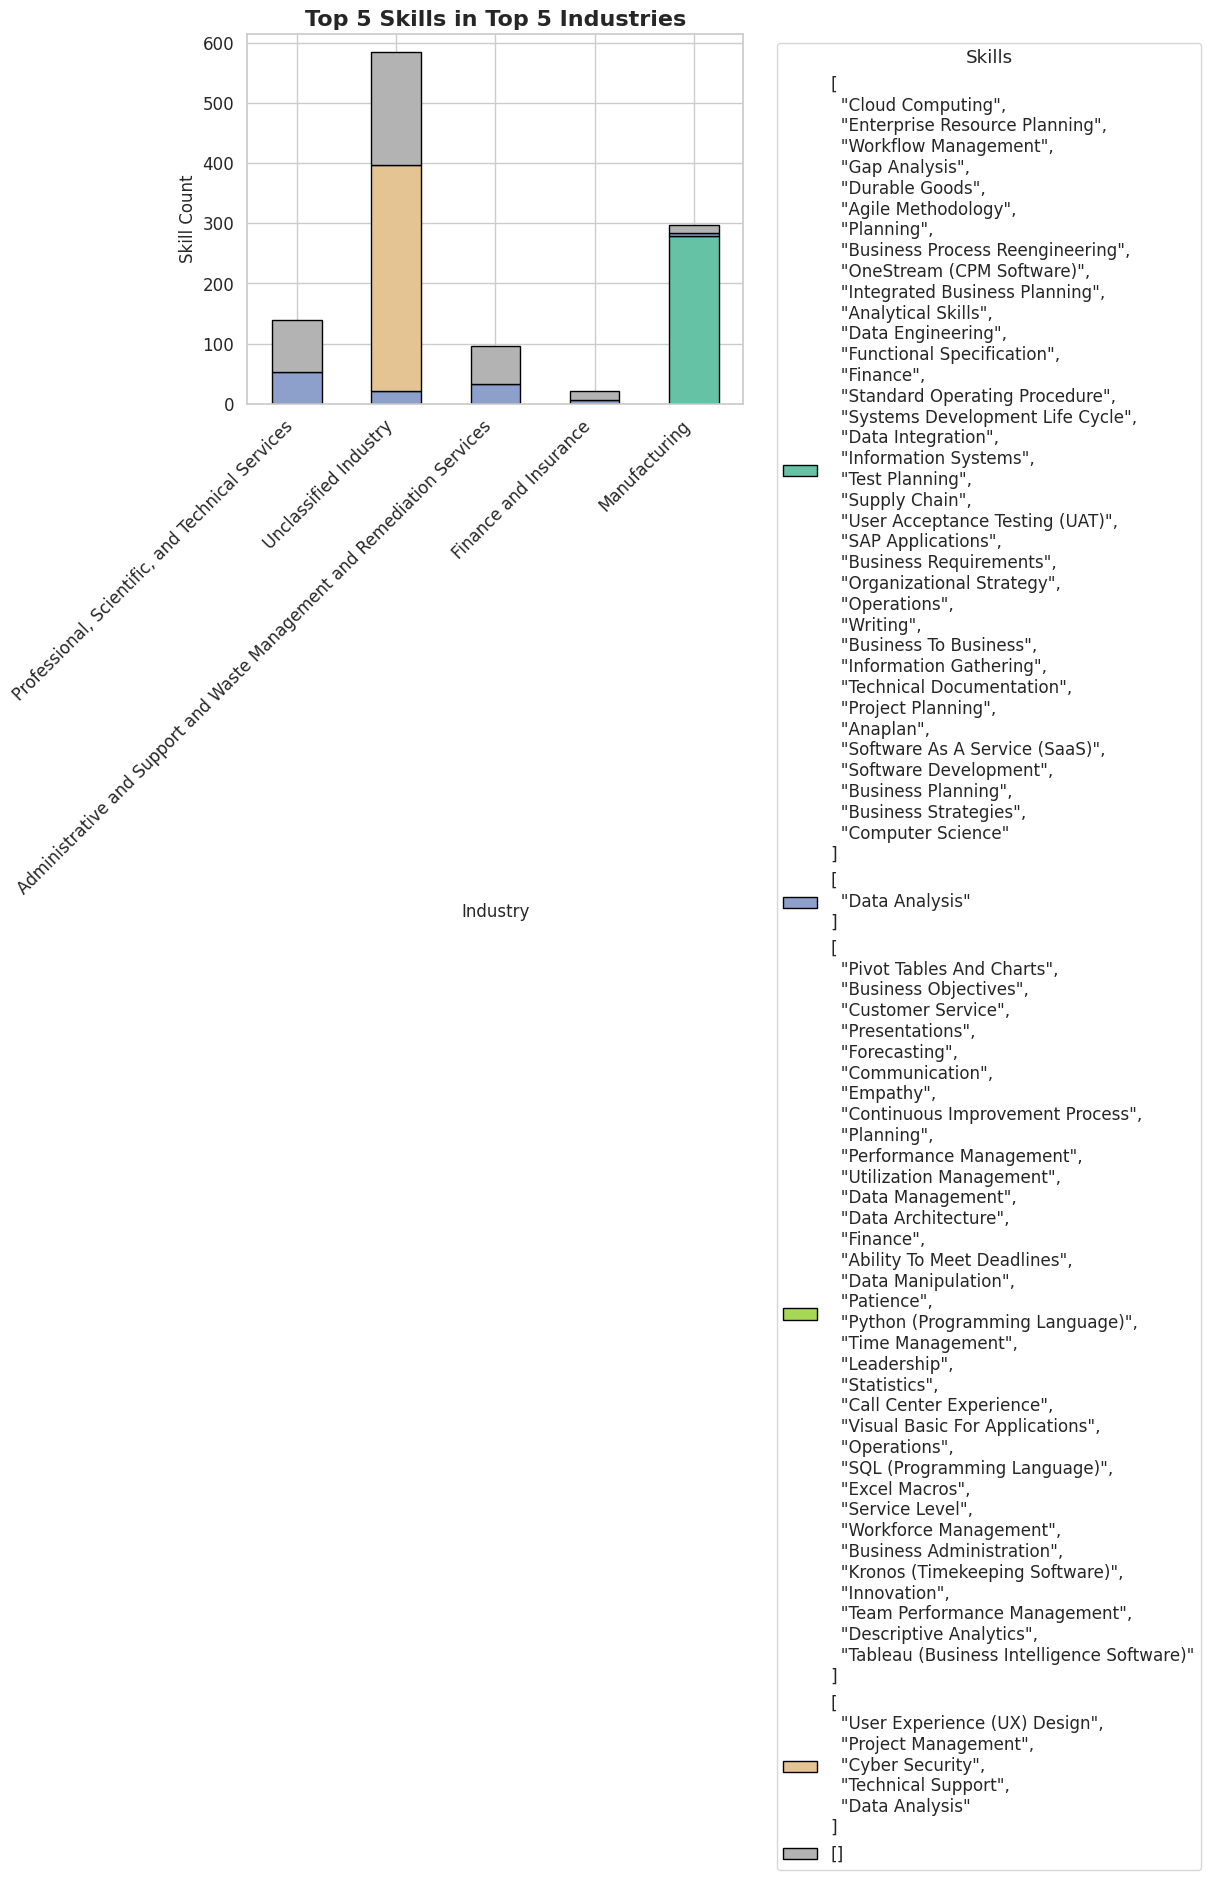

In [8]:
# Your code for 6th question here
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lightcast_job_postings.csv")

df_skills = df[df['SKILLS_NAME'].notna() & df['NAICS2_NAME'].notna()]

df_skills['SKILLS_LIST'] = df_skills['SKILLS_NAME'].str.split(';')

df_exploded = df_skills.explode('SKILLS_LIST')

df_exploded = df_exploded[df_exploded['SKILLS_LIST'].notna()]
df_exploded['SKILLS_LIST'] = df_exploded['SKILLS_LIST'].str.strip()

top_skills = df_exploded['SKILLS_LIST'].value_counts().head(5).index.tolist()

df_top_skills = df_exploded[df_exploded['SKILLS_LIST'].isin(top_skills)]

skill_counts = df_top_skills.groupby(['NAICS2_NAME', 'SKILLS_LIST']).size().unstack(fill_value=0)

top_industries = df['NAICS2_NAME'].value_counts().head(5).index.tolist()
skill_counts = skill_counts.loc[top_industries]

plt.figure(figsize=(12, 6))
skill_counts.plot(kind='bar', stacked=True, colormap='Set2', edgecolor='black')

plt.title("Top 5 Skills in Top 5 Industries", fontsize=16, fontweight='bold')
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Skill Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Skills", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


This stacked bar chart highlights the top five skills within the most active hiring industries. Industries such as “Administrative and Support Services” and “Unclassified” show both high volume and diversity of skill demand, while core technical skills like Data Analysis and SQL appear consistently across multiple sectors—showcasing their broad applicability in the job market.


# Salary Analysis by ONET Occupation Type (Bubble Chart)
- Analyze how salaries differ across ONET occupation types.
- **Aggregate Data**
  - Compute **median salary** for each occupation in the **ONET taxonomy**.
- **Visualize results**
  - Create a **bubble chart** where:
    - **X-axis** = `ONET_NAME`
    - **Y-axis** = `Median Salary`
    - **Size** = Number of job postings
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

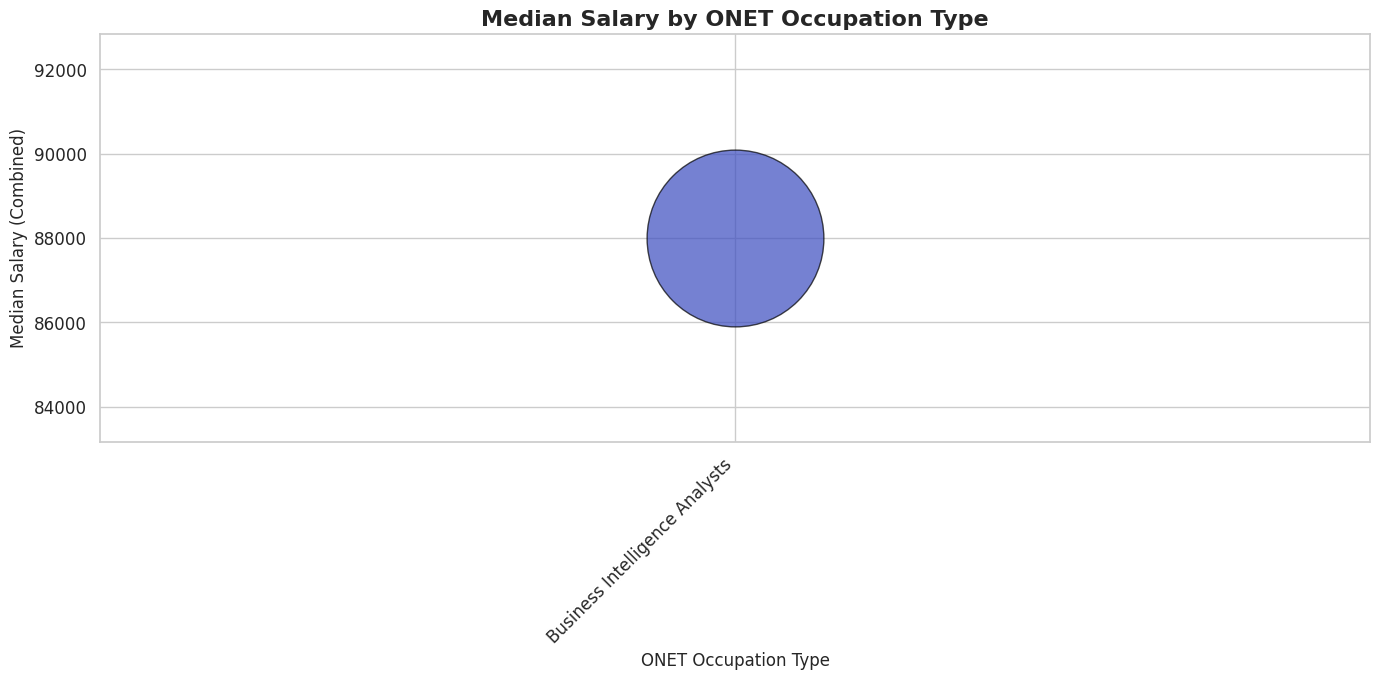

In [11]:
# Your code for 7th question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("lightcast_job_postings.csv")

df['SALARY_COMBINED'] = df['SALARY_FROM'].fillna(df['SALARY_TO'])

df_bubble = df[
    (df['ONET_NAME'].notna()) &
    (df['SALARY_COMBINED'].notna()) &
    (df['SALARY_COMBINED'] > 1000)
]

salary_by_onet = df_bubble.groupby('ONET_NAME').agg(
    Median_Salary=('SALARY_COMBINED', 'median'),
    Job_Count=('ONET_NAME', 'count')
).reset_index()

top_onet = salary_by_onet.sort_values(by='Job_Count', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.set(style="whitegrid", font_scale=1.1)

scatter = plt.scatter(
    top_onet['ONET_NAME'],
    top_onet['Median_Salary'],
    s=top_onet['Job_Count'] / 2,
    c=top_onet['Median_Salary'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='black'
)

plt.title("Median Salary by ONET Occupation Type", fontsize=16, fontweight='bold')
plt.xlabel("ONET Occupation Type", fontsize=12)
plt.ylabel("Median Salary (Combined)", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



This bubble chart illustrates the median salary (~$88,000) for Business Intelligence Analysts, the only ONET occupation with sufficient combined salary data in the dataset. The large bubble size indicates a high job volume, highlighting the dominant presence and demand for this role in the job market.

# Career Pathway Trends (Sankey Diagram)
- Visualize job transitions between different occupation levels.
- **Aggregate Data**
  - Identify career transitions between **SOC job classifications**.
- **Visualize results**
  - Create a **Sankey diagram** where:
    - **Source** = `SOC_2021_2_NAME`
    - **Target** = `SOC_2021_3_NAME`
    - **Value** = Number of transitions
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [1]:
# Your code for 8th question here
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

init_notebook_mode(connected=True)

df = pd.read_csv("lightcast_job_postings.csv")

df_sankey = df[df['SOC_2021_2_NAME'].notna() & df['SOC_2021_3_NAME'].notna()]

path_counts = df_sankey.groupby(['SOC_2021_2_NAME', 'SOC_2021_3_NAME']).size().reset_index(name='count')

path_counts = path_counts.sort_values(by='count', ascending=False).head(15)

labels = list(pd.unique(path_counts['SOC_2021_2_NAME'].tolist() + path_counts['SOC_2021_3_NAME'].tolist()))

label_index = {label: i for i, label in enumerate(labels)}

source = path_counts['SOC_2021_2_NAME'].map(label_index)
target = path_counts['SOC_2021_3_NAME'].map(label_index)
value = path_counts['count']

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(100, 149, 237, 0.6)"
    )
)])

fig.update_layout(
    title_text="Career Pathway Trends: SOC_2021_2 to SOC_2021_3",
    font_size=12
)

iplot(fig)


/tmp/ipykernel_3529/1473357855.py:16: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



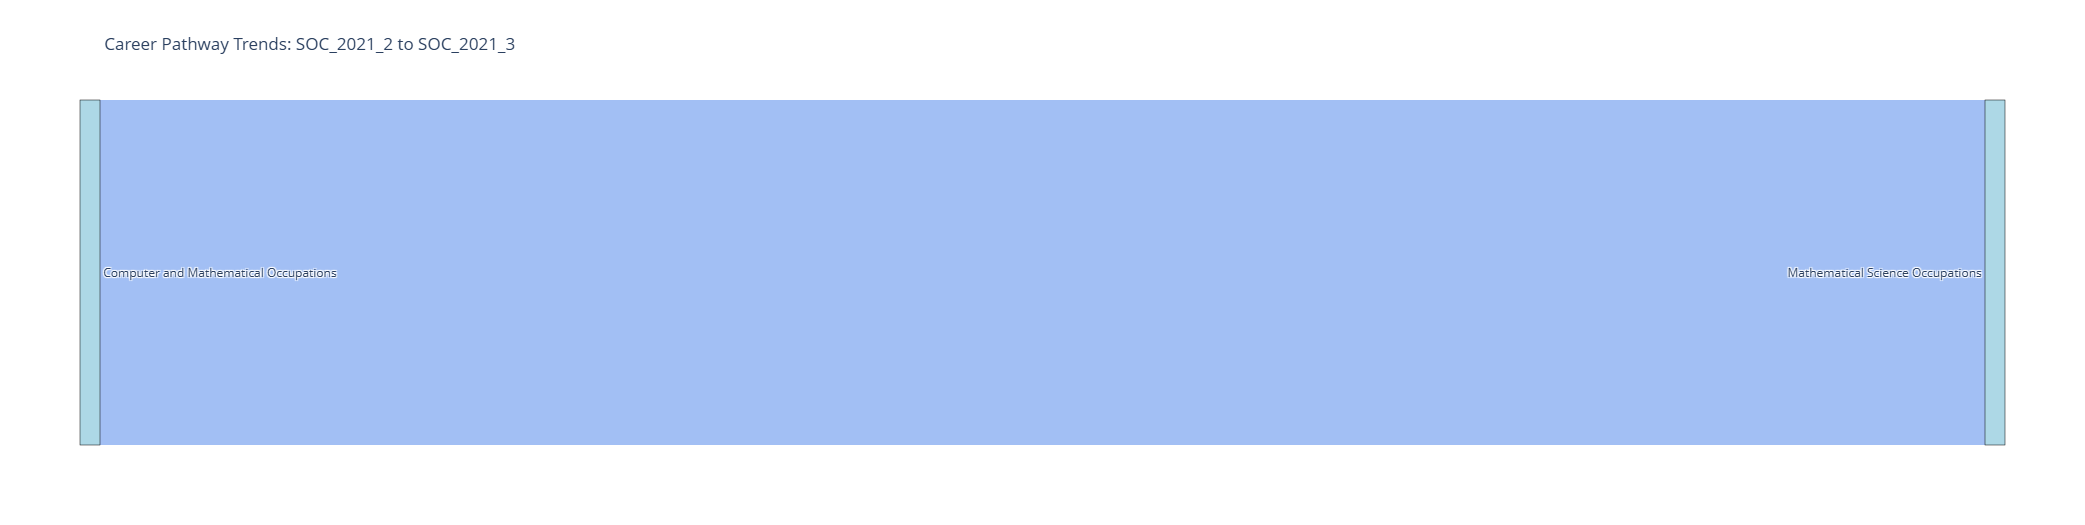

The Sankey diagram reveals a single dominant job flow from Computer and Mathematical Occupations to Mathematical Science Occupations, totaling 72,500 positions. This suggests that your dataset is either heavily concentrated in this SOC group or lacks diversified SOC mappings.